In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from torch.utils.data import DataLoader
import os
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from dataset.sentinel import *
from models.lstm import *
import torch
import random
sys.path.append('../esa')
from esa.load_utils import *
from esa.lstm_utils import *

from omegaconf import OmegaConf
from notebook_utils import launch_train_advice

import numpy as np

architecture = 'lstm'
os.environ['architecture'] = architecture
config_file = os.path.join(conf_path, architecture+'.yaml')
cfg = OmegaConf.load(config_file)
cfg.dataset.out_window = cfg.dataset.sequence_length

In [6]:
if os.path.exists(model_results+ '{}/'.format(architecture)):
    model_list = os.listdir(model_results+ '{}/'.format(architecture))
    for ix, mn in enumerate(model_list):  
        print('model num {}: {}'.format(ix,model_list[ix]))
else:
    os.makedirs(model_results+ '{}/'.format(architecture))
    model_list = []

In [7]:
launch_train_advice(cfg, model_list, config_file)

no model available, to train a model  switch train_model to True in the next cell 

check the configuration file in /srv/penny/FIORIRE/time_series_anomaly_detection/configuration/lstm.yaml to set the hyperparameters of the model

actual dataset configuration is {'name': 'all_2016-2018_clean_std_4s.pkl', 'sequence_length': 16, 'columns': ['RW1_motcurr', 'RW2_motcurr', 'RW3_motcurr', 'RW4_motcurr', 'RW1_cmd_volt', 'RW2_cmd_volt', 'RW3_cmd_volt', 'RW4_cmd_volt', 'RW1_therm', 'RW2_therm', 'RW3_therm', 'RW4_therm', 'RW1_speed', 'RW2_speed', 'RW3_speed', 'RW4_speed'], 'train_val_split': 0.7, 'shuffle': 0, 'columns_subset': 0, 'dataset_subset': 1000000, 'batch_size': 500, 'sampling_rate': '4s', 'scaled': 1, 'target': None, 'forecast': 0, 'forecast_all': 0, 'predict': 0, 'out_window': 16}

actual architecture configuration is {'architecture': 'lstm', 'embedding_dim': 64, 'latent_dim': 100, 'n_layers_1': 1, 'n_layers_2': 1}

actual opt configuration is {'epochs': 200, 'lr': 0.001, 'lr_patience'

In [11]:
train_model = True

In [12]:
if train_model:
    !python ../main.py --config_name $architecture

now = 2023-03-24 11:10:00.244161
/home/robertomorelli/anaconda3/envs/fdir/lib/python3.8/site-packages/torch/cuda/__init__.py:123: UserWarning: 
    Found GPU0 NVIDIA GeForce GTX TITAN Black which is of cuda capability 3.5.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is 3.7.
    
  warnings.warn(old_gpu_warn % (d, name, major, minor, min_arch // 10, min_arch % 10))
/home/robertomorelli/anaconda3/envs/fdir/lib/python3.8/site-packages/torch/cuda/__init__.py:123: UserWarning: 
    Found GPU1 NVIDIA GeForce GTX TITAN Black which is of cuda capability 3.5.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is 3.7.
    
  warnings.warn(old_gpu_warn % (d, name, major, minor, min_arch // 10, min_arch % 10))
Encoder(
  (LSTMenc): LSTM(16, 128, batch_first=True)
  (LSTM1): LSTM(128, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=16,

 13%|████▊                                | 180/1400 [00:33<02:59,  6.79batch/s]Loss:
0.030395714566111565

 14%|█████                                | 190/1400 [00:35<03:22,  5.97batch/s]Loss:
0.02829652465879917

 14%|█████▎                               | 200/1400 [00:37<03:06,  6.45batch/s]Loss:
0.025802580639719963

 15%|█████▌                               | 210/1400 [00:38<03:12,  6.17batch/s]Loss:
0.024210622534155846

 16%|█████▊                               | 220/1400 [00:40<03:15,  6.02batch/s]Loss:
0.022135231643915176

 16%|██████                               | 230/1400 [00:41<02:46,  7.05batch/s]Loss:
0.021557537838816643

 17%|██████▎                              | 240/1400 [00:44<05:05,  3.80batch/s]Loss:
0.019480355083942413

 18%|██████▌                              | 250/1400 [00:45<02:59,  6.39batch/s]Loss:
0.01937292329967022

 19%|██████▊                              | 260/1400 [00:47<02:51,  6.63batch/s]Loss:
0.01794506050646305

 19%|███████▏                  

 26%|█████████▊                           | 370/1400 [01:06<02:55,  5.88batch/s]Loss:
0.009899240918457508

 27%|██████████                           | 380/1400 [01:10<08:00,  2.12batch/s]Loss:
0.009499176405370235

 28%|██████████▎                          | 390/1400 [01:12<03:02,  5.52batch/s]Loss:
0.00866454467177391

 29%|██████████▌                          | 400/1400 [01:14<02:32,  6.58batch/s]Loss:
0.008757369592785835

 29%|██████████▊                          | 410/1400 [01:15<02:42,  6.08batch/s]Loss:
0.008043814450502396

 30%|███████████                          | 420/1400 [01:17<02:44,  5.96batch/s]Loss:
0.00837289821356535

 31%|███████████▎                         | 430/1400 [01:19<02:57,  5.46batch/s]Loss:
0.007387624587863684

 31%|███████████▋                         | 440/1400 [01:21<02:57,  5.40batch/s]Loss:
0.006914596073329449

 32%|███████████▉                         | 450/1400 [01:22<02:08,  7.38batch/s]Loss:
0.006631901953369379

 33%|████████████▏            

 40%|██████████████▊                      | 560/1400 [01:43<02:25,  5.78batch/s]Loss:
0.0045290119014680386

 41%|███████████████                      | 570/1400 [01:44<02:17,  6.04batch/s]Loss:
0.00468695443123579

 41%|███████████████▎                     | 580/1400 [01:47<02:33,  5.35batch/s]Loss:
0.004414144437760115

 42%|███████████████▌                     | 590/1400 [01:49<06:37,  2.04batch/s]Loss:
0.004277880769222975

 43%|███████████████▊                     | 600/1400 [01:52<02:28,  5.40batch/s]Loss:
0.004015534184873104

 44%|████████████████                     | 610/1400 [01:54<02:17,  5.75batch/s]Loss:
0.004216777626425028

 44%|████████████████▍                    | 620/1400 [01:55<02:14,  5.80batch/s]Loss:
0.004126768093556166

 45%|████████████████▋                    | 630/1400 [01:57<02:14,  5.71batch/s]Loss:
0.0037319548428058624

 46%|████████████████▉                    | 640/1400 [01:59<02:14,  5.65batch/s]Loss:
0.003615878988057375

 46%|█████████████████▏    

 53%|███████████████████▌                 | 740/1400 [02:16<01:34,  7.00batch/s]Loss:
0.003000684315338731

 54%|███████████████████▊                 | 750/1400 [02:18<01:41,  6.38batch/s]Loss:
0.0028350534848868847

 54%|████████████████████                 | 760/1400 [02:22<02:58,  3.58batch/s]Loss:
0.0030984997283667326

 55%|████████████████████▎                | 770/1400 [02:23<01:45,  6.00batch/s]Loss:
0.0029328803066164255

 56%|████████████████████▌                | 780/1400 [02:25<01:52,  5.51batch/s]Loss:
0.0027289532590657473

 56%|████████████████████▉                | 790/1400 [02:27<01:52,  5.43batch/s]Loss:
0.002963922917842865

 57%|█████████████████████▏               | 800/1400 [02:29<01:51,  5.40batch/s]Loss:
0.0026240870356559753

 58%|█████████████████████▍               | 810/1400 [02:31<01:27,  6.71batch/s]Loss:
0.0026286339852958918

 59%|█████████████████████▋               | 820/1400 [02:34<02:52,  3.37batch/s]Loss:
0.0026566802989691496

 59%|████████████████

 66%|████████████████████████▌            | 930/1400 [02:55<00:59,  7.84batch/s]Loss:
0.002062214072793722

 67%|████████████████████████▊            | 940/1400 [02:56<01:05,  7.08batch/s]Loss:
0.0021051852963864803

 68%|█████████████████████████            | 950/1400 [02:58<01:14,  6.07batch/s]Loss:
0.0020310652907937765

 69%|█████████████████████████▎           | 960/1400 [03:00<01:19,  5.53batch/s]Loss:
0.0019728313200175762

 69%|█████████████████████████▋           | 970/1400 [03:01<01:12,  5.96batch/s]Loss:
0.0019643399864435196

 70%|█████████████████████████▉           | 980/1400 [03:03<00:55,  7.61batch/s]Loss:
0.0018683950183913112

 71%|██████████████████████████▏          | 990/1400 [03:04<00:58,  7.03batch/s]Loss:
0.0019726587925106287

 71%|█████████████████████████▋          | 1000/1400 [03:08<01:53,  3.53batch/s]Loss:
0.0018716058693826199

 72%|█████████████████████████▉          | 1010/1400 [03:09<01:06,  5.90batch/s]Loss:
0.001948998193256557

 73%|████████████████

 80%|████████████████████████████▊       | 1120/1400 [03:30<00:47,  5.94batch/s]Loss:
0.001642432645894587

 81%|█████████████████████████████       | 1130/1400 [03:31<00:46,  5.83batch/s]Loss:
0.0015992240514606237

 81%|█████████████████████████████▎      | 1140/1400 [03:34<00:45,  5.71batch/s]Loss:
0.001367582706734538

 82%|█████████████████████████████▌      | 1150/1400 [03:35<00:41,  6.00batch/s]Loss:
0.001387056545354426

 83%|█████████████████████████████▊      | 1160/1400 [03:37<00:40,  5.98batch/s]Loss:
0.0014065656578168273

 84%|██████████████████████████████      | 1170/1400 [03:39<00:43,  5.28batch/s]Loss:
0.001294431509450078

 84%|██████████████████████████████▎     | 1180/1400 [03:40<00:37,  5.80batch/s]Loss:
0.001223472529090941

 85%|██████████████████████████████▌     | 1190/1400 [03:42<00:32,  6.48batch/s]Loss:
0.0013712653890252113

 86%|██████████████████████████████▊     | 1200/1400 [03:44<00:30,  6.62batch/s]Loss:
0.0012474386021494865

 86%|███████████████████

 94%|█████████████████████████████████▋  | 1310/1400 [04:07<00:16,  5.32batch/s]Loss:
0.0010697421384975314

 94%|█████████████████████████████████▉  | 1320/1400 [04:09<00:13,  5.95batch/s]Loss:
0.0010169497691094875

 95%|██████████████████████████████████▏ | 1330/1400 [04:11<00:13,  5.29batch/s]Loss:
0.0009580887272022665

 96%|██████████████████████████████████▍ | 1340/1400 [04:13<00:18,  3.18batch/s]Loss:
0.0011982421856373549

 96%|██████████████████████████████████▋ | 1350/1400 [04:15<00:08,  5.74batch/s]Loss:
0.0009558338788338006

 97%|██████████████████████████████████▉ | 1360/1400 [04:17<00:06,  6.55batch/s]Loss:
0.0009882161393761635

 98%|███████████████████████████████████▏| 1370/1400 [04:18<00:04,  6.51batch/s]Loss:
0.0009970894316211343

 99%|███████████████████████████████████▍| 1380/1400 [04:20<00:02,  7.10batch/s]Loss:
0.0009020257275551558

 99%|███████████████████████████████████▋| 1390/1400 [04:21<00:01,  8.17batch/s]Loss:
0.0008947666501626372

100%|██████████████

Evaluating:  65%|██████████████████▊          | 390/600 [00:48<00:25,  8.31it/s]


Evaluating: 100%|█████████████████████████████| 600/600 [01:10<00:00,  8.57it/s]
eval loss 0.00148905550808801
val_loss improved from 10000000000000000 to 0.00148905550808801, saving model  lstm_sl_16_emb_64_layers_1_1_24_03_2023_11:10:00 to /srv/penny/FIORIRE/time_series_anomaly_detection/model_results/lstm
  0%|                                               | 0/1400 [00:00<?, ?batch/s]Loss:
0.0009671587613411248

  1%|▎                                     | 10/1400 [00:02<04:23,  5.27batch/s]Loss:
0.0009051790693774819

  1%|▌                                     | 20/1400 [00:04<04:00,  5.74batch/s]Loss:
0.0008677663863636553

  2%|▊                                     | 30/1400 [00:05<03:54,  5.85batch/s]Loss:
0.0008211591048166156

  3%|█                                     | 37/1400 [00:07<06:17,  3.61batch/s]^C


In [13]:
model_list = os.listdir(model_results+ '{}/'.format(architecture))
if len(model_list) > 0:
    model_list = os.listdir(model_results+ '{}/'.format(architecture))
    for ix, mn in enumerate(model_list):  
        print('model num {}: {}'.format(ix,model_list[ix]))
    model_available = True
else:
    print('no model available')

model num 0: lstm_sl_16_emb_64_layers_1_1_24_03_2023_11:10:00.pth


In [14]:
selected_model = 0
if model_available:
    print(model_list[selected_model])
    model_name = model_list[selected_model].split('.')[0]
else:
    print('no model available')

lstm_sl_16_emb_64_layers_1_1_24_03_2023_11:10:00.pth


In [15]:
try:
    sm = str(torch.cuda.get_device_capability())
    sm = ''.join((sm.strip('()').split(',')[0], sm.strip('()').split(',')[1])).replace(' ', '')
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda and sm in torch.cuda.get_arch_list() else "cpu")
except:
    device='cpu'

/home/robertomorelli/anaconda3/envs/fdir/lib/python3.8/site-packages/torch/cuda/__init__.py:123: UserWarning: 
    Found GPU0 NVIDIA GeForce GTX TITAN Black which is of cuda capability 3.5.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is 3.7.
    
  warnings.warn(old_gpu_warn % (d, name, major, minor, min_arch // 10, min_arch % 10))
/home/robertomorelli/anaconda3/envs/fdir/lib/python3.8/site-packages/torch/cuda/__init__.py:123: UserWarning: 
    Found GPU1 NVIDIA GeForce GTX TITAN Black which is of cuda capability 3.5.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is 3.7.
    
  warnings.warn(old_gpu_warn % (d, name, major, minor, min_arch // 10, min_arch % 10))


In [16]:
checkpoint  = torch.load(model_results+ '{}/'.format(architecture) + '/' + model_list[selected_model])
params_conf = checkpoint['param_conf']

In [17]:
cols = params_conf['columns']
sequence_length = params_conf['sequence_length']
batch_size = params_conf['batch_size']
predict = params_conf['predict']

out_window = params_conf['out_window']

latent_dim = params_conf['latent_dim']
seq_len = params_conf['sequence_length']

n_features = params_conf['n_features']
scaled = params_conf['scaled']
sampling_rate = params_conf['sampling_rate']

try:
    no_latent = params_conf['no_latent']
except:
    no_latent = False
shuffle = False

data_path = params_conf['data_path']

In [18]:
dataset_name = os.path.join(data_path, "all_2016-2018_clean_std_4s.pkl")
transform = None
df_train, df_test, train_iter, test_iter = \
read_dataset(dataset_name=dataset_name, scaled=params_conf['scaled'], cols=params_conf['columns'],
columns_subset=params_conf['columns_subset'], dataset_subset=params_conf['dataset_subset']
, sequence_length=params_conf['sequence_length'],out_window=params_conf['sequence_length'], 
train_val_split=params_conf['train_val_split'], batch_size=params_conf['batch_size'], transform=transform)  

In [19]:
model = LSTM(seq_in=params_conf['sequence_length'], seq_out= params_conf['out_window']
              , n_features=params_conf['n_features'],
            output_size=len(params_conf['target']), embedding_dim=params_conf['embedding_dim'],
            n_layers_1=params_conf['n_layers_1'], n_layers_2=params_conf['n_layers_2']).to(device)
model.load_state_dict(checkpoint['model_state_dict'])
par_nums=count_parameters(model)
print('parameters number', par_nums)
model.to(device).eval()

Encoder(
  (LSTMenc): LSTM(16, 128, batch_first=True)
  (LSTM1): LSTM(128, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=16, bias=True)
)
parameters number 125456


LSTM(
  (encoder): Encoder(
    (LSTMenc): LSTM(16, 128, batch_first=True)
    (LSTM1): LSTM(128, 64, batch_first=True)
    (out): Linear(in_features=64, out_features=16, bias=True)
  )
)

In [20]:
compute_mse_val_loss = False

In [21]:
mse_val_loss_list = []
criterion = nn.MSELoss()
if compute_mse_val_loss:
    for i, (x,y) in enumerate(test_iter):
        yo = model(x)
        mse_val_loss_list.append(criterion(yo, x).item())
    mse_val_loss = np.mean(mse_val_loss_list)
    print(mse_val_loss)

In [22]:
num_batch = 10
print('time horizon {}'.format(num_batch*params_conf['sequence_length']))
x, shift = unrolling_batches(num_batch=num_batch, test_iter=test_iter, 
                     sequence_length=params_conf['sequence_length'], cols=params_conf['columns']
                             , shift = None)

time horizon 160
random shift 69690


In [23]:
yo = model(x.to(device))

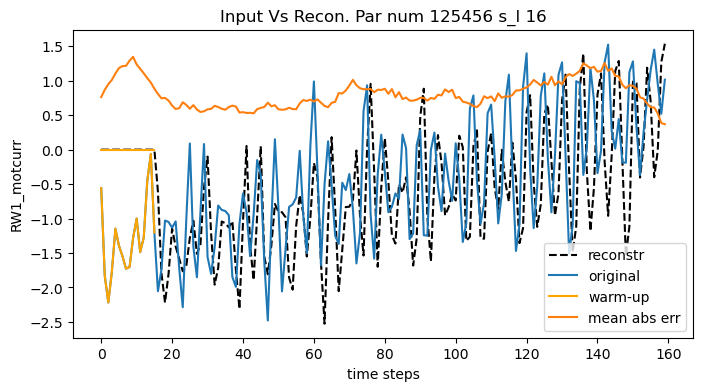

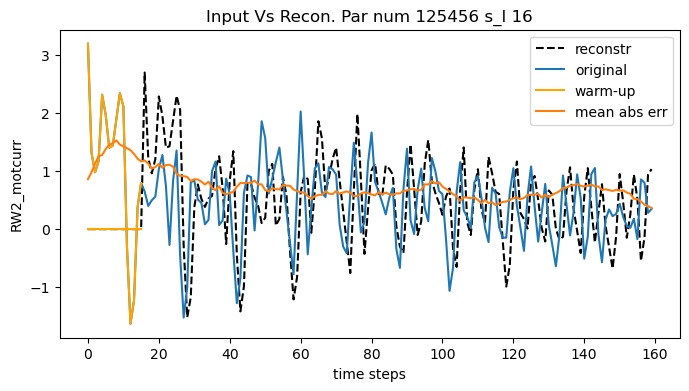

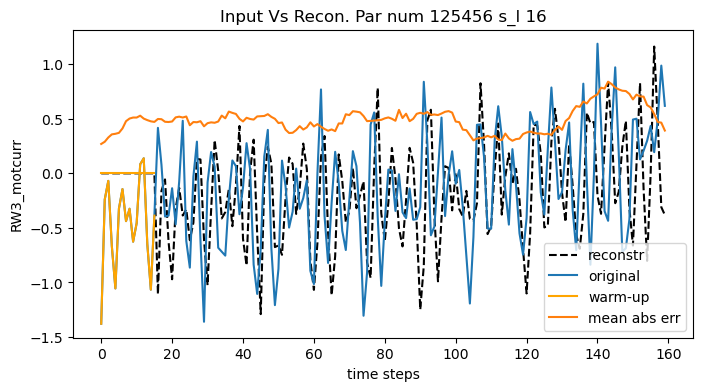

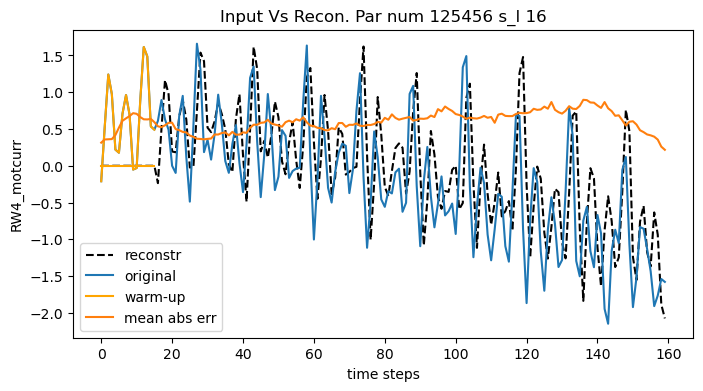

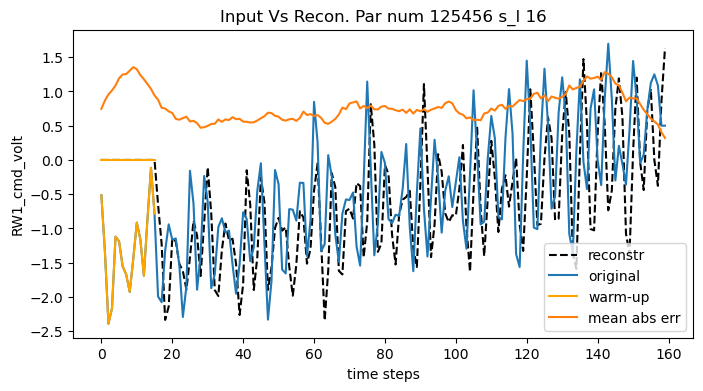

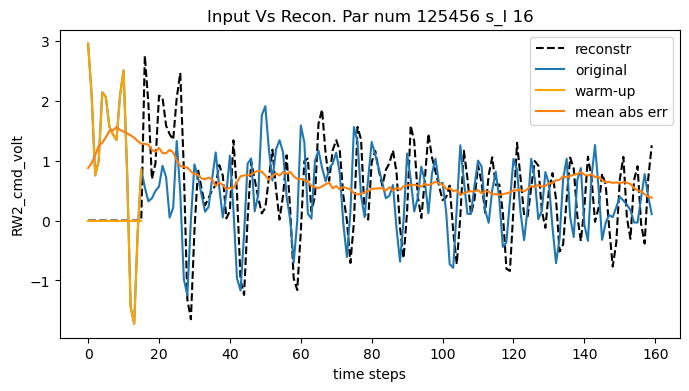

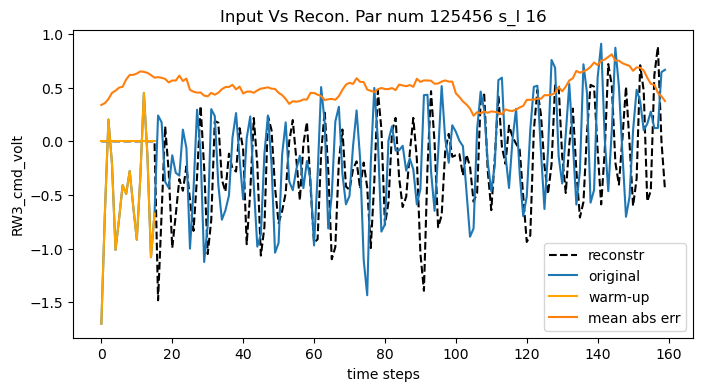

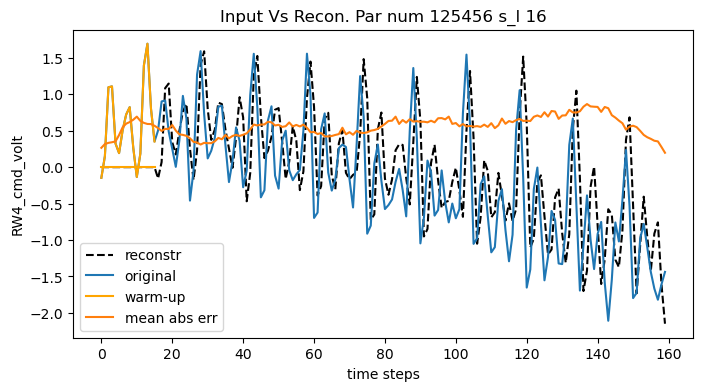

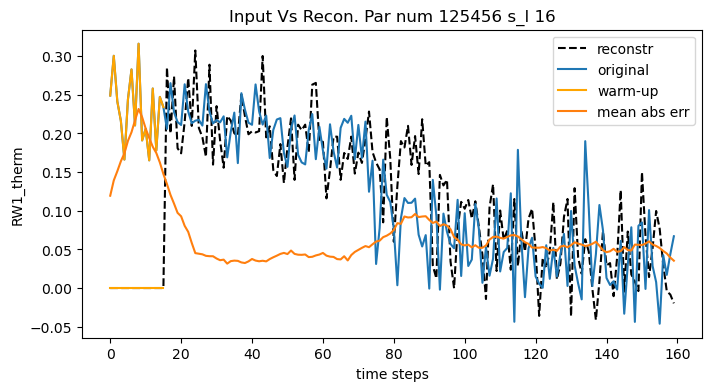

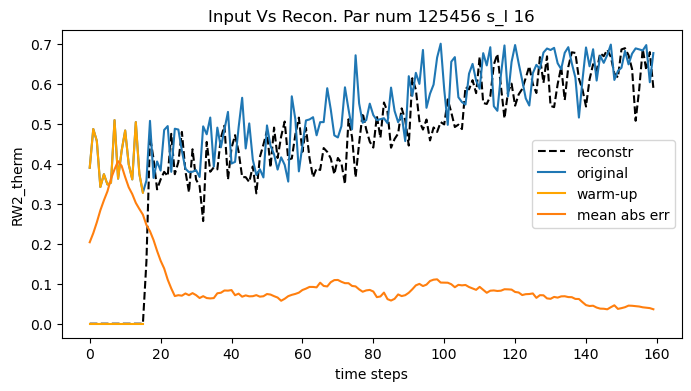

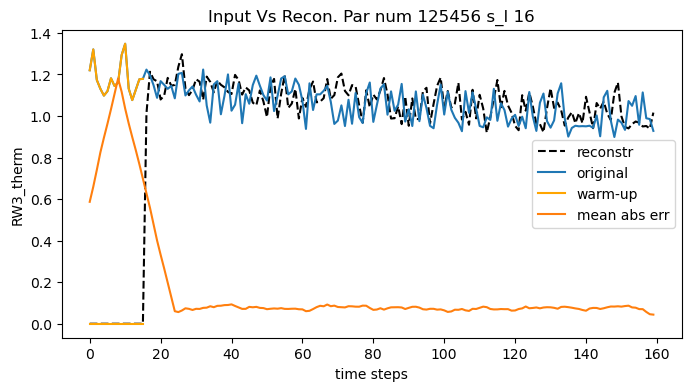

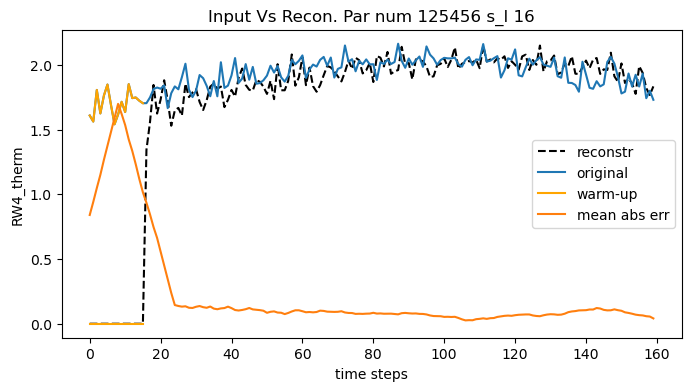

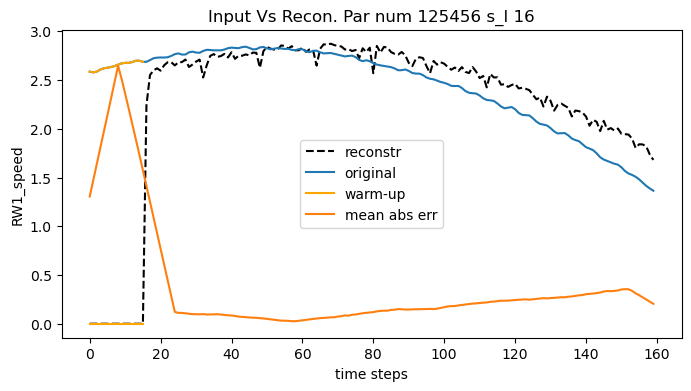

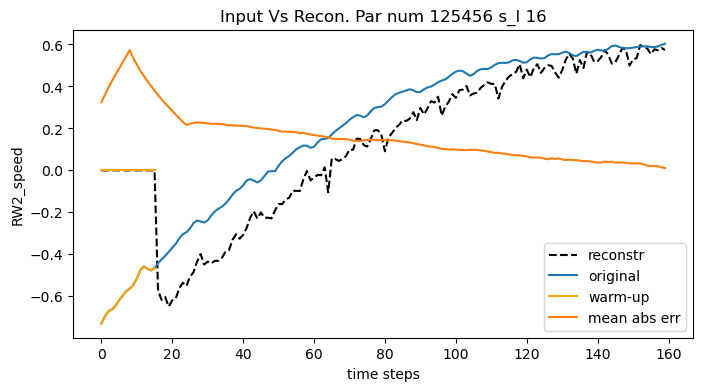

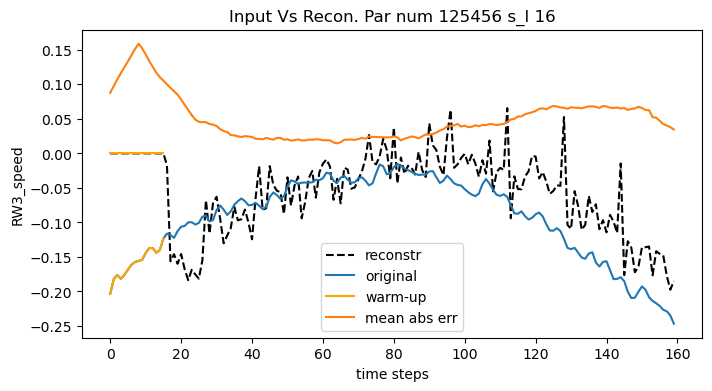

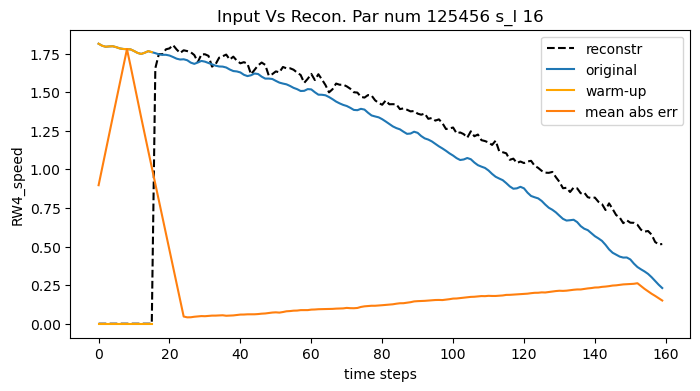

In [24]:
show_results(x.to(device),yo,params_conf['columns'],
    model_name,params_conf,par_nums,shift,
    num_batch,architecture='lstm',
    save=False)